In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
from collections import Counter, defaultdict
import plotly.graph_objects as go
import numpy as np
from itertools import combinations

from netwulf import visualize
import netwulf as nw

import seaborn as sns

In [15]:
R = pd.read_pickle("edgelist_reindexed_2.pkl")

In [16]:
# If we want to filter on 
mask = (R._start_type == "Officers") & (R._end_type == "Entity")
VC = R[mask].link.value_counts()
beneficiary = np.array([0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,
                       0,0,0,0,0,0,0,0], dtype = bool)

print( "Beneficiary classes: ", list(VC.iloc[:len(beneficiary)][beneficiary].index ))
print("--------------")
print( "Nominee class: ",       list(VC.iloc[:len(beneficiary)][~beneficiary].index ))

Beneficiary classes:  ['beneficiary of', 'Ultimate Beneficial Owner', 'owner of', 'Beneficial Owner', 'beneficial owner of', 'ultimate beneficial owner of', 'partner of', 'trust settlor of']
--------------
Nominee class:  ['shareholder of', 'director of', 'secretary of', 'judicial representative of', 'legal representative of', 'records & registers of', 'auditor of', 'managing director of', 'director', 'vice-president of', 'liquidator of', 'is signatory for', 'president of', 'intermediary of', 'auditor', 'secretary', 'proxy of', 'manager of', 'treasurer of', 'chairman of', 'appleby assigned attorney', 'power of attorney of', 'director / president', 'board-member of', 'director / secretary', 'executive director of', 'trustee of trust of', 'assistant secretary of', 'president', 'connected to', 'authorised person / signatory of', 'chief executive officer of', 'protector of', 'chairman of the board of', 'chief financial officer of', 'power of attorney', 'independent non executive director o

In [18]:
VC2 = VC.reset_index()
VC2.columns = ["name", "counts",]
VC2["prop"] = (VC2.counts / VC2.counts.sum()).astype(float)
VC2["cumsum"] = VC2.counts.cumsum()
VC2["cumsum"] = VC2["cumsum"].values / VC2.counts.sum()

In [19]:
VC2[:50]

,name,counts,prop,cumsum
0,shareholder of,583438,0.344035,0.344035
1,director of,452535,0.266846,0.610881
2,secretary of,112192,0.066156,0.677037
3,judicial representative of,109526,0.064584,0.741621
4,legal representative of,99181,0.058484,0.800105
5,records & registers of,36318,0.021416,0.821521
6,auditor of,27242,0.016064,0.837585
7,beneficiary of,23602,0.013917,0.851502
8,managing director of,22624,0.013341,0.864843
9,Ultimate Beneficial Owner,21827,0.012871,0.877713


In [9]:
ben_class = list(VC.iloc[:len(beneficiary)][beneficiary].index)
R = R[(R._start_type.isin(["Officers","Intermediaries"])) & (R._end_type == "Entity")]
mask = (R._start_type == "Intermediaries") | ( (R._start_type == "Officers") & R.link.isin(ben_class) )
R = R[mask]

In [8]:
R[R._start_type == "Intermediaries"]._start_name.value_counts().iloc[:20]

Morning Star Holdings Limited                   35358
MOSSACK FONSECA & CO. (BAHAMAS) LIMITED         14903
UBS TRUSTEES (BAHAMAS) LTD.                      9731
CREDIT SUISSE TRUST LIMITED                      8305
TRIDENT CORPORATE SERVICES (BAH) LTD             8302
MMG BAHAMAS LTD.                                 8157
Internal User                                    7900
ORION HOUSE SERVICES (HK) LIMITED                7017
Unitrust Corporate Services Ltd.                 5699
K.M.C. CORPORATE SERVICES LTD.                   5318
** DISABLED SUISSE SECURITY BANK & TRUST         5014
PRIVATE TRUST CORPORATION LIMITED                5007
MOSSACK FONSECA & CO.                            4365
H & J CORPORATE SERVICES LTD.                    4351
PRIME CORPORATE SOLUTIONS SARL                   4117
OFFSHORE BUSINESS CONSULTANT (INT'L) LIMITED     4094
GTC CORPORATE SERVICES LIMITED                   4060
M B & H CORPORATE SERVICES LIMITED               4026
Sealight Incorporations Limi

In [10]:
%%time
edges = []
for i,df in R.groupby("_end"):
    if len( df._start_type.value_counts() ) >= 2:
        ints = df[df._start_type == "Intermediaries"]._start.unique()
        offs = df[df._start_type == "Officers"]._start.unique()
        edges += list( product(ints, offs) )

Wall time: 5min 49s


In [11]:
id2country = dict(zip(np.hstack((R._start.values, R._end.values)), 
                  np.hstack((R._start_country.values, R._end_country.values))))

id2name    =  dict(zip(np.hstack((R._start.values, R._end.values)), 
                  np.hstack((R._start_name.values, R._end_name.values))))

In [12]:
df = pd.DataFrame(edges, columns = ["Intermediary", "Officer"])
df["Int_Country"] = df.Intermediary.apply(lambda x: id2country[x])
df["Off_Country"] = df.Officer.apply(lambda x: id2country[x])
df["Off_Name"] = df.Officer.apply(lambda x: id2name[x])
df["Int_Name"] = df.Intermediary.apply(lambda x: id2name[x])

In [180]:
hit_list = ["RUS", "USA", 
            "CHN", 
            'HKG']

In [171]:
all_off_edges = []
for i, df2 in df.groupby("Intermediary"):
    all_off_edges += list( combinations(df2.Officer.unique(), 2) )

In [181]:
NUM_CUTOFF = 3

In [195]:
c_rows = []
for c in hit_list:
    print(c)
    df_sub = df[ df["Off_Country"] == c ]
    top_inters = df_sub.Intermediary.value_counts().index[:NUM_CUTOFF]
    c_rows.append([c] + [id2name[n] for n in top_inters] )
c_rows = pd.DataFrame(c_rows)
c_rows

RUS
USA
CHN
HKG


,0,1,2,3
0,RUS,CHRISTODOULOS VASSILIADES,LEGAL CONSULTING SERVICES LIMITED,CONSULCO INTERNATIONAL LIMITED
1,USA,Appleby Services (Bermuda) Ltd.,Raiskin & Revitz,Appleby Trust (Cayman) Ltd.
2,CHN,OFFSHORE BUSINESS CONSULTANT (INT'L) LIMITED,ORION HOUSE SERVICES (HK) LIMITED,QING DAO GAO BAO INVESTMENT CONSULTANT LIMITED
3,HKG,K.S. LIU CORPORATE SERVICES LTD.,PricewaterhouseCoopers Ltd.,Vistra Hong Kong


In [183]:
%%time
# size_Dict, clust_Dict, trans_Dict, tri_Dict, red_Dict = {}, {}, {}, {}, {}

for c in hit_list:
    print(c)
    df_sub = df[ df["Off_Country"] == c ]
    
    size          = []    
    clustering    = []
    transitivity  = []
    triangles     = []
    redundancy    = []
            
    for i in range(NUM_CUTOFF + 1):
        print(i)
        top_inters = df_sub.Intermediary.value_counts().index[:i]
        df_sub_remove = df_sub[~df_sub.Intermediary.isin(top_inters)]
        
        if i == (NUM_CUTOFF + 1):
            print(top_inters)
        
        ## Gives the combos of intermediaries.
        off_edges = []
        for i, df2 in df_sub_remove.groupby("Intermediary"):
            off_edges += list( combinations(df2.Officer.unique(), 2) )
        
        # print("Init Graph")
        G = nx.Graph()
        G.add_edges_from(off_edges)
    
        size.append( len(G) )
        clustering.append( np.mean( list(nx.clustering(G).values()) )  )
        # print("Clustered")
        transitivity.append(nx.transitivity(G))
        # print("Trans")
        triangles.append(np.mean( list(nx.triangles(G).values()) ))
        cc_size = [len(g) for g in nx.connected_components(G)]
        # print("CC")
        paths = np.sum( [(x*(x-1))/2 for x in cc_size] )
        redundancy.append( paths )
    
    size_Dict[c]  = np.array(size) # / size[0]
    clust_Dict[c] = np.array(clustering)
    trans_Dict[c] = np.array(transitivity)
    tri_Dict[c]   = np.array(triangles)
    red_Dict[c]   = np.array(redundancy)

RUS
0
1
2
3
USA
0
1
2
3
CHN
0
1
2
3
HKG
0
1
2
3
CHE
0
1
2
3
Wall time: 10min 38s


In [184]:
all_Dicts = [size_Dict, clust_Dict, 
#              trans_Dict, 
             tri_Dict, red_Dict]
dict_measure = ["Size", "Clustering", 
#                 "Transitivity", 
                "Triangles", "Redundancy"]

In [185]:
hit_list = ['RUS', 'USA', 'CHN', 'HKG', ]

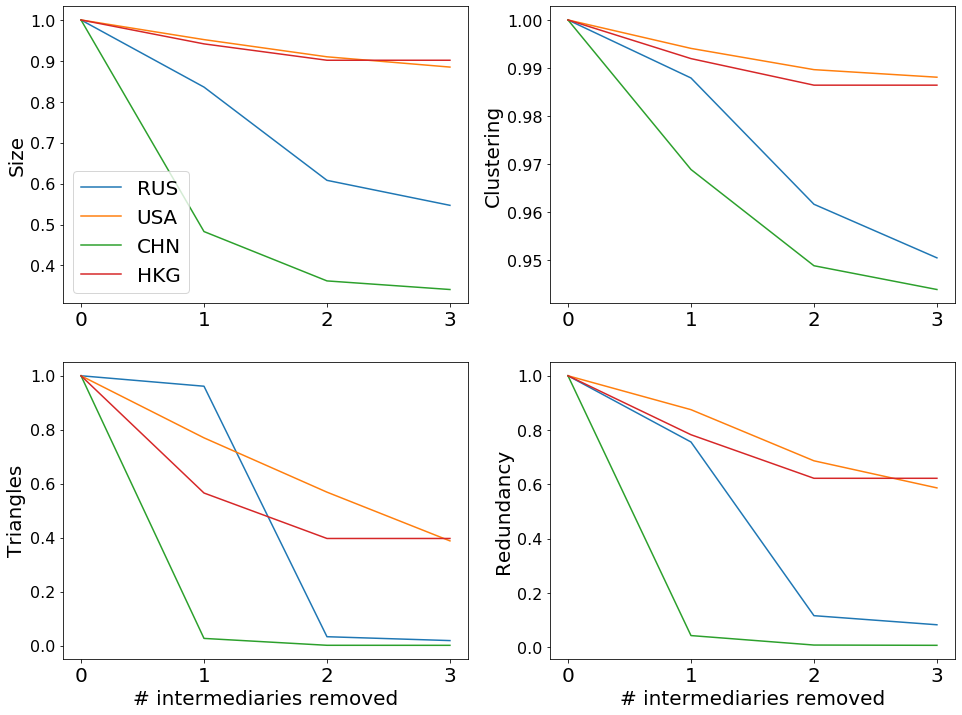

In [244]:
plt.figure(figsize=(16,12))

for i, dd in enumerate(all_Dicts):
    plt.subplot(2,2,i+1)
    for c in hit_list:
        plt.plot(range(NUM_CUTOFF+1), dd[c] / dd[c][0], label = c)
    if i == 0:
        plt.legend(fontsize=20)
    plt.ylabel(dict_measure[i],fontsize=20)
    plt.xticks(range(NUM_CUTOFF+1), fontsize=20)
    plt.yticks(fontsize=16)
    if i in [2,3]:
        plt.xlabel("# intermediaries removed", fontsize = 20)
    # plt.ylim(-0.05,1.05)
plt.savefig("figures/knock-out.png", bbox_inches="tight")